In [1]:
sspa_path = "/archive/projects/SSPA_BRAY/sspa"
data_path = sspa_path + "/biorepository"
bcell_gex=data_path + "/Bcell_GEX_20251201.h5ad "


In [2]:
pathways = sspa_path + "/c2.cp.v2024.1.Hs.symbols.gmt"

In [5]:
import gseapy as gp

# Load pathways from GMT file
pathways_dict = gp.read_gmt(pathways)

print(f"Loaded {len(pathways_dict)} pathways from GMT file")
print(f"First 5 pathway names: {list(pathways_dict.keys())[:5]}")

Loaded 3917 pathways from GMT file
First 5 pathway names: ['SA_B_CELL_RECEPTOR_COMPLEXES', 'SA_CASPASE_CASCADE', 'SA_FAS_SIGNALING', 'SA_G1_AND_S_PHASES', 'SA_G2_AND_M_PHASES']


In [8]:
pathways_dict

{'SA_B_CELL_RECEPTOR_COMPLEXES': ['ATF2',
  'BCR',
  'BLNK',
  'ELK1',
  'FOS',
  'GRB2',
  'HRAS',
  'JUN',
  'LYN',
  'MAP2K1',
  'MAP3K1',
  'MAPK1',
  'MAPK3',
  'MAPK8IP3',
  'PAPPA',
  'RAC1',
  'RPS6KA1',
  'RPS6KA3',
  'SHC1',
  'SOS1',
  'SYK',
  'VAV1',
  'VAV2',
  'VAV3'],
 'SA_CASPASE_CASCADE': ['APAF1',
  'BIRC2',
  'BIRC3',
  'CASP10',
  'CASP3',
  'CASP7',
  'CASP8',
  'CASP9',
  'DFFA',
  'DFFB',
  'FAS',
  'FASLG',
  'GZMB',
  'PARP1',
  'PRF1',
  'SCAP',
  'SREBF1',
  'SREBF2',
  'XIAP'],
 'SA_FAS_SIGNALING': ['BCL2',
  'CASP3',
  'CASP8',
  'CFL1',
  'CFLAR',
  'FAS',
  'FASLG',
  'PDE6D',
  'S100A10'],
 'SA_G1_AND_S_PHASES': ['ARF1',
  'ARF3',
  'CCND1',
  'CDK2',
  'CDK4',
  'CDKN1A',
  'CDKN1B',
  'CDKN2A',
  'CFL1',
  'E2F1',
  'E2F2',
  'MDM2',
  'NXT1',
  'PRB1',
  'TP53'],
 'SA_G2_AND_M_PHASES': ['CDC25A',
  'CDC25B',
  'CDK1',
  'CDK7',
  'CDKN1A',
  'CHEK1',
  'NEK1',
  'WEE1'],
 'SA_MMP_CYTOKINE_CONNECTION': ['ACE',
  'CD44',
  'CSF1',
  'FCGR3A',
  'IL1B',

In [9]:
import scanpy as sc

adata = sc.read_h5ad(bcell_gex.strip())

In [10]:
adata

AnnData object with n_obs × n_vars = 5223 × 36601
    obs: 'group', 'condition', 't2dm', 'cvda', 'pt_id', 'comb_id', 'Sex', 'celltype_subclust'
    var: 'gene_ids', 'feature_types', 'genome', 'mito', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_type_colors', 'cell_type_rank_genes_groups', 'dendrogram_cell_type', 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'leiden_rank_genes_groups', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'raw'
    obsp: 'connectivities', 'distances'

In [11]:
adata.obs['condition'].value_counts()

condition
c1d1    421
c0d0    395
c0d1    168
Name: count, dtype: int64

In [12]:
adata.obs

,group,condition,t2dm,cvda,pt_id,comb_id,Sex,celltype_subclust
AAAGGTAAGTAGCAAT-1,A,c0d0,0,0,A1,A0,Female,B Cell
AACAAAGCATCGTGGC-1,A,c0d0,0,0,A1,A0,Female,B Cell
AACCAACGTAGTCTGT-1,A,c0d0,0,0,A1,A0,Female,B Cell
AAGCGTTAGGTGAGCT-1,A,c0d0,0,0,A1,A0,Female,B Cell
AAGTGAAAGATAACGT-1,A,c0d0,0,0,A1,A0,Female,B Cell
...,...,...,...,...,...,...,...,...
TTTGACTCACAAAGCG-4,D,NaN,1,1,D5,D5,Male,B Cell
TTTGGAGAGCACTAAA-4,D,NaN,1,1,D2,D2,Female,B Cell
TTTGGTTTCATGAGTC-4,D,NaN,1,1,D2,D2,Female,B Cell
TTTGGTTTCCACTGGG-4,D,NaN,1,1,D5,D5,Male,B Cell


In [13]:
adata.obs['pt_id'].nunique()

28

In [14]:
# adata.var['highly_variable'].value_counts()

In [15]:
raw_df = adata.to_df(layer="raw")

In [16]:
raw_df

,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.5,AL627309.4,AP006222.2,AL732372.1,...,AC133551.1,AC136612.1,AC136616.1,AC136616.3,AC136616.2,AC141272.1,AC023491.2,AC007325.1,AC007325.4,AC007325.2
AAAGGTAAGTAGCAAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AACAAAGCATCGTGGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AACCAACGTAGTCTGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAGCGTTAGGTGAGCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAGTGAAAGATAACGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGACTCACAAAGCG-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGGAGAGCACTAAA-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGGTTTCATGAGTC-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGGTTTCCACTGGG-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# highly_variable_genes = adata.var[adata.var['highly_variable']].index
# raw_df_filtered = raw_df[highly_variable_genes]

In [18]:
# raw_df_filtered

In [19]:
control_cases = raw_df[adata.obs['t2dm'] == 0]

In [20]:
control_cases

,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.5,AL627309.4,AP006222.2,AL732372.1,...,AC133551.1,AC136612.1,AC136616.1,AC136616.3,AC136616.2,AC141272.1,AC023491.2,AC007325.1,AC007325.4,AC007325.2
AAAGGTAAGTAGCAAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AACAAAGCATCGTGGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AACCAACGTAGTCTGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAGCGTTAGGTGAGCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAGTGAAAGATAACGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGAGAGGTACATA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGGTTCAAGTGTCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGGTTTCTAAGCGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTTGCACCAGTTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
import pickle
import numpy as np
import pandas as pd
import scipy.sparse as sp
import os
from typing import Tuple, Dict, List, Optional
import sys

In [22]:
sys.path.append('/labs/Aguiar/SSPA_BRAY/BRay/VariationalInference')

from gene_convertor import GeneIDConverter

# Initialize gene converter globally
gene_converter = GeneIDConverter()

Loaded gene ID cache with 139415 symbol mappings


In [23]:
def load_gene_annotation(annotation_path: str) -> Tuple[pd.DataFrame, Dict, List]:
    """
    Load gene annotation file and convert gene names to Ensembl IDs.
    
    Args:
        annotation_path: Path to gene annotation CSV file
        
    Returns:
        Tuple of (gene_annotation, ensembl_map, ensembl_ids)
    """
    print(f"Loading gene annotation from {annotation_path}...")
    gene_annotation = pd.read_csv(annotation_path)
    gene_annotation = gene_annotation.set_index('Genename')
    
    gene_names = gene_annotation.index.tolist()
    gene_annotation_ensembl_map, gene_annotation_ensembl_ids = gene_converter.symbols_to_ensembl(gene_names)
    
    print(f"Loaded annotation for {len(gene_annotation)} genes")
    
    return gene_annotation, gene_annotation_ensembl_map, gene_annotation_ensembl_ids

In [24]:
gene_annotation_path = "/labs/Aguiar/SSPA_BRAY/BRay/BRAY_FileTransfer/ENS_mouse_geneannotation.csv"
gene_annotation = pd.read_csv(gene_annotation_path)
gene_annotation = gene_annotation.set_index('Genename')

In [25]:
gene_names = gene_annotation.index.tolist()

gene_annotation_ensembl_map, gene_annotation_ensembl_ids = gene_converter.symbols_to_ensembl(gene_names)

Detected gene format: symbol
All 46078 genes found in cache or already in Ensembl format


In [26]:
# Convert gene names to Ensembl IDs
sample_gene_names = control_cases.columns.tolist()
sample_ensembl_map, _ = gene_converter.symbols_to_ensembl(sample_gene_names)
ensembl_names = [sample_ensembl_map.get(gene, gene) for gene in sample_gene_names]
control_cases.columns = ensembl_names

# Remove duplicate genes
print(f"Shape before removing duplicates: {control_cases.shape}")
mask = ~control_cases.columns.duplicated(keep='first')
control_cases = control_cases.loc[:, mask]
print(f"Shape after removing duplicates: {control_cases.shape}")

# Filter for protein-coding genes (requires gene_annotation to be loaded first)
print("Filtering for protein-coding genes...")
protein_coding_genes = gene_annotation[
    gene_annotation['Genetype'] == 'protein_coding'
]['GeneID'].tolist()

common_genes = control_cases.columns.intersection(protein_coding_genes)
control_cases = control_cases[common_genes]
print(f"Final shape after protein coding filter: {control_cases.shape}")


Detected gene format: symbol
All 36601 genes found in cache or already in Ensembl format
Shape before removing duplicates: (2049, 36601)
Shape after removing duplicates: (2049, 16423)
Filtering for protein-coding genes...
Final shape after protein coding filter: (2049, 16051)


In [27]:
control_cases

,ENSMUSG00000096351,ENSMUSG00000095567,ENSMUSG00000078485,ENSMUSG00000078486,ENSMUSG00000035692,ENSMUSG00000041936,ENSMUSG00000029074,ENSMUSG00000041954,ENSMUSG00000029075,ENSMUSG00000029076,...,ENSMUSG00000064351,ENSMUSG00000064354,ENSMUSG00000064356,ENSMUSG00000064357,ENSMUSG00000064358,ENSMUSG00000064360,ENSMUSG00000065947,ENSMUSG00000064363,ENSMUSG00000064367,ENSMUSG00000064368
AAAGGTAAGTAGCAAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,15.0,3.0,44.0,20.0,11.0,1.0,14.0,3.0,0.0
AACAAAGCATCGTGGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,22.0,19.0,7.0,38.0,29.0,21.0,1.0,15.0,6.0,1.0
AACCAACGTAGTCTGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.0,28.0,8.0,38.0,23.0,28.0,2.0,11.0,6.0,1.0
AAGCGTTAGGTGAGCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30.0,37.0,3.0,43.0,37.0,25.0,3.0,15.0,6.0,3.0
AAGTGAAAGATAACGT-1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,45.0,2.0,70.0,36.0,39.0,2.0,34.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGAGAGGTACATA-1,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,1.0,...,218.0,234.0,27.0,261.0,209.0,229.0,13.0,158.0,34.0,6.0
TTTGGTTCAAGTGTCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,108.0,119.0,28.0,159.0,113.0,70.0,5.0,81.0,22.0,3.0
TTTGGTTTCTAAGCGT-1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,75.0,93.0,24.0,102.0,84.0,101.0,5.0,54.0,15.0,3.0
TTTGTTGCACCAGTTA-1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,310.0,199.0,50.0,196.0,320.0,195.0,10.0,86.0,48.0,10.0


In [28]:
# random_sample = random_sample.sample(n=200, random_state=42)

In [29]:
# random_sample

In [30]:
# Check the highest expression values in control_cases
print("Highest expression values in control_cases:")
print(f"Maximum value: {control_cases.max().max()}")
print(f"Mean of maximum values per gene: {control_cases.max().mean()}")
print(f"Mean of maximum values per cell: {control_cases.max(axis=1).mean()}")

# Show top 10 highest expression values and their locations
max_values = control_cases.max()
top_genes = max_values.nlargest(10)
print(f"\nTop 10 genes by maximum expression:")
for gene, value in top_genes.items():
    print(f"{gene}: {value}")

# Show some statistics about the expression distribution
print(f"\nExpression distribution statistics:")
print(f"Overall mean: {control_cases.mean().mean():.4f}")
print(f"Overall std: {control_cases.std().std():.4f}")
print(f"Percentage of zeros: {(control_cases == 0).sum().sum() / (control_cases.shape[0] * control_cases.shape[1]) * 100:.2f}%")


Highest expression values in control_cases:
Maximum value: 808.0
Mean of maximum values per gene: 7.2411065101623535
Mean of maximum values per cell: 107.83016204833984

Top 10 genes by maximum expression:
ENSMUSG00000067149: 808.0
ENSMUSG00000064358: 771.0
ENSMUSG00000064354: 638.0
ENSMUSG00000064351: 618.0
ENSMUSG00000064357: 556.0
ENSMUSG00000079523: 407.0
ENSMUSG00000064360: 404.0
ENSMUSG00000040270: 331.0
ENSMUSG00000064363: 288.0
ENSMUSG00000093674: 271.0

Expression distribution statistics:
Overall mean: 0.4870
Overall std: 1.7251
Percentage of zeros: 84.61%


In [32]:
# Check for genes that are zero across all samples
zero_genes = (control_cases == 0).all(axis=0)
num_zero_genes = zero_genes.sum()

print(f"Number of genes with zero expression across all samples: {num_zero_genes}")
print(f"Percentage of genes with all zeros: {(num_zero_genes / len(control_cases.columns)) * 100:.2f}%")

if num_zero_genes > 0:
    print(f"\nGenes with all zero expression:")
    zero_gene_names = control_cases.columns[zero_genes].tolist()
    print(f"First 20 genes: {zero_gene_names[:20]}")

Number of genes with zero expression across all samples: 0
Percentage of genes with all zeros: 0.00%


In [34]:
# Remove genes with zero expression across all samples
control_cases = control_cases.loc[:, (control_cases != 0).any(axis=0)]
print(f"Shape after removing all-zero genes: {control_cases.shape}")

# Keep only genes expressed in at least 2% of cells
min_cells = int(0.02 * control_cases.shape[0])  # 2% of cells
genes_to_keep = (control_cases > 0).sum(axis=0) >= min_cells
control_cases = control_cases.loc[:, genes_to_keep]
print(f"Shape after keeping genes expressed in at least 2% of cells (>={min_cells} cells): {control_cases.shape}")

Shape after removing all-zero genes: (2049, 9860)
Shape after keeping genes expressed in at least 2% of cells (>=40 cells): (2049, 9860)


In [35]:
control_cases

,ENSMUSG00000095567,ENSMUSG00000035692,ENSMUSG00000041954,ENSMUSG00000029076,ENSMUSG00000050796,ENSMUSG00000023286,ENSMUSG00000029033,ENSMUSG00000051557,ENSMUSG00000029034,ENSMUSG00000029071,...,ENSMUSG00000064351,ENSMUSG00000064354,ENSMUSG00000064356,ENSMUSG00000064357,ENSMUSG00000064358,ENSMUSG00000064360,ENSMUSG00000065947,ENSMUSG00000064363,ENSMUSG00000064367,ENSMUSG00000064368
AAAGGTAAGTAGCAAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,15.0,3.0,44.0,20.0,11.0,1.0,14.0,3.0,0.0
AACAAAGCATCGTGGC-1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.0,19.0,7.0,38.0,29.0,21.0,1.0,15.0,6.0,1.0
AACCAACGTAGTCTGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.0,28.0,8.0,38.0,23.0,28.0,2.0,11.0,6.0,1.0
AAGCGTTAGGTGAGCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30.0,37.0,3.0,43.0,37.0,25.0,3.0,15.0,6.0,3.0
AAGTGAAAGATAACGT-1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,45.0,2.0,70.0,36.0,39.0,2.0,34.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGAGAGGTACATA-1,0.0,6.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,218.0,234.0,27.0,261.0,209.0,229.0,13.0,158.0,34.0,6.0
TTTGGTTCAAGTGTCT-1,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,108.0,119.0,28.0,159.0,113.0,70.0,5.0,81.0,22.0,3.0
TTTGGTTTCTAAGCGT-1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,75.0,93.0,24.0,102.0,84.0,101.0,5.0,54.0,15.0,3.0
TTTGTTGCACCAGTTA-1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,310.0,199.0,50.0,196.0,320.0,195.0,10.0,86.0,48.0,10.0


In [36]:
# Extract t2dm and pt_id columns from adata.obs for the control_cases indices
features_matrix = adata.obs.loc[control_cases.index, ['t2dm', 'pt_id']].copy()

features_matrix


,t2dm,pt_id
AAAGGTAAGTAGCAAT-1,0,A1
AACAAAGCATCGTGGC-1,0,A1
AACCAACGTAGTCTGT-1,0,A1
AAGCGTTAGGTGAGCT-1,0,A1
AAGTGAAAGATAACGT-1,0,A1
...,...,...
TTTGGAGAGGTACATA-1,0,A8
TTTGGTTCAAGTGTCT-1,0,A4
TTTGGTTTCTAAGCGT-1,0,A8
TTTGTTGCACCAGTTA-1,0,A8


In [37]:
features_matrix['pt_id'].nunique()

9

In [38]:
import os
import json
from sklearn.model_selection import train_test_split

# Create output directory
output_dir = '/labs/Aguiar/SSPA_BRAY/BRay/ctrl_sspa_test'
os.makedirs(output_dir, exist_ok=True)

# Split the data: 70% train, 15% validation, 15% test
train_ids, temp_ids = train_test_split(control_cases.index, test_size=0.3, random_state=42)
val_ids, test_ids = train_test_split(temp_ids, test_size=0.5, random_state=42)

print(f"Train size: {len(train_ids)}")
print(f"Validation size: {len(val_ids)}")
print(f"Test size: {len(test_ids)}")

# Save data split cell IDs
data_split = {
    'train': train_ids.tolist(),
    'val': val_ids.tolist(),
    'test': test_ids.tolist()
}

with open(os.path.join(output_dir, 'data_split_cell_ids.json'), 'w') as f:
    json.dump(data_split, f, indent=2)

# Save the expression dataframe (df.pkl)
control_cases.to_pickle(os.path.join(output_dir, 'df.pkl'))

# Save the features dataframe (features.pkl)
features_matrix.to_pickle(os.path.join(output_dir, 'features.pkl'))

# Save train data with full genes (train_data_full_genes.csv)
train_data = control_cases.loc[train_ids]
train_data.to_csv(os.path.join(output_dir, 'train_data_full_genes.csv'))

# Save gene list
gene_list = control_cases.columns.tolist()
with open(os.path.join(output_dir, 'gene_list.txt'), 'w') as f:
    for gene in gene_list:
        f.write(f"{gene}\n")

print(f"\nFiles saved in: {output_dir}")
print(f"- df.pkl: {control_cases.shape}")
print(f"- features.pkl: {features_matrix.shape}")
print(f"- train_data_full_genes.csv: {train_data.shape}")
print(f"- gene_list.txt: {len(gene_list)} genes")
print(f"- data_split_cell_ids.json")

Train size: 1434
Validation size: 307
Test size: 308

Files saved in: /labs/Aguiar/SSPA_BRAY/BRay/ctrl_sspa_test
- df.pkl: (2049, 9860)
- features.pkl: (2049, 2)
- train_data_full_genes.csv: (1434, 9860)
- gene_list.txt: 9860 genes
- data_split_cell_ids.json


In [40]:
# Filter pathways to keep only those starting with REACTOME_
reactome_pathways = {k: v for k, v in pathways_dict.items() if k.startswith('REACTOME_')}

print(f"Original number of pathways: {len(pathways_dict)}")
print(f"Number of REACTOME pathways: {len(reactome_pathways)}")
print(f"First 10 REACTOME pathway names: {list(reactome_pathways.keys())[:10]}")

Original number of pathways: 3917
Number of REACTOME pathways: 1736
First 10 REACTOME pathway names: ['REACTOME_2_LTR_CIRCLE_FORMATION', 'REACTOME_ABACAVIR_ADME', 'REACTOME_ABACAVIR_TRANSMEMBRANE_TRANSPORT', 'REACTOME_ABC_FAMILY_PROTEINS_MEDIATED_TRANSPORT', 'REACTOME_ABC_TRANSPORTERS_IN_LIPID_HOMEOSTASIS', 'REACTOME_ABC_TRANSPORTER_DISORDERS', 'REACTOME_ABERRANT_REGULATION_OF_MITOTIC_EXIT_IN_CANCER_DUE_TO_RB1_DEFECTS', 'REACTOME_ABERRANT_REGULATION_OF_MITOTIC_G1_S_TRANSITION_IN_CANCER_DUE_TO_RB1_DEFECTS', 'REACTOME_ABORTIVE_ELONGATION_OF_HIV_1_TRANSCRIPT_IN_THE_ABSENCE_OF_TAT', 'REACTOME_ACETYLCHOLINE_BINDING_AND_DOWNSTREAM_EVENTS']


In [41]:
reactome_pathways

{'REACTOME_2_LTR_CIRCLE_FORMATION': ['BANF1',
  'HMGA1',
  'LIG4',
  'PSIP1',
  'XRCC4',
  'XRCC5',
  'XRCC6'],
 'REACTOME_ABACAVIR_ADME': ['ABCB1',
  'ABCG2',
  'ADAL',
  'ADH1A',
  'NT5C2',
  'PCK1',
  'SLC22A1',
  'SLC22A2',
  'SLC22A3'],
 'REACTOME_ABACAVIR_TRANSMEMBRANE_TRANSPORT': ['ABCB1',
  'ABCG2',
  'SLC22A1',
  'SLC22A2',
  'SLC22A3'],
 'REACTOME_ABC_FAMILY_PROTEINS_MEDIATED_TRANSPORT': ['ABCA10',
  'ABCA12',
  'ABCA2',
  'ABCA3',
  'ABCA4',
  'ABCA5',
  'ABCA6',
  'ABCA7',
  'ABCA8',
  'ABCA9',
  'ABCB1',
  'ABCB10',
  'ABCB4',
  'ABCB5',
  'ABCB6',
  'ABCB7',
  'ABCB8',
  'ABCB9',
  'ABCC1',
  'ABCC10',
  'ABCC11',
  'ABCC2',
  'ABCC3',
  'ABCC4',
  'ABCC5',
  'ABCC6',
  'ABCC9',
  'ABCD1',
  'ABCD2',
  'ABCD3',
  'ABCF1',
  'ABCG1',
  'ABCG4',
  'ABCG5',
  'ABCG8',
  'APOA1',
  'CFTR',
  'DERL1',
  'DERL2',
  'DERL3',
  'EIF2S1',
  'EIF2S2',
  'EIF2S3',
  'ERLEC1',
  'ERLIN1',
  'ERLIN2',
  'KCNJ11',
  'OS9',
  'PEX19',
  'PEX3',
  'PSMA1',
  'PSMA2',
  'PSMA3',
  'PSMA4'

In [44]:
import gzip

# Load gene programs
gene_programs = pd.read_csv('/labs/Aguiar/SSPA_BRAY/sspa_gene_programs.csv.gz', compression='gzip')

# Load model
with open('/labs/Aguiar/SSPA_BRAY/sspa_model.pkl', 'rb') as f:
    sspa_model = pickle.load(f)

# Load predictions
test_predictions = pd.read_csv('/labs/Aguiar/SSPA_BRAY/sspa_test_predictions.csv.gz', compression='gzip')
val_predictions = pd.read_csv('/labs/Aguiar/SSPA_BRAY/sspa_val_predictions.csv.gz', compression='gzip')

# Load theta matrices
theta_test = pd.read_csv('/labs/Aguiar/SSPA_BRAY/sspa_theta_test.csv.gz', compression='gzip', index_col=0)
theta_train = pd.read_csv('/labs/Aguiar/SSPA_BRAY/sspa_theta_train.csv.gz', compression='gzip', index_col=0)
theta_val = pd.read_csv('/labs/Aguiar/SSPA_BRAY/sspa_theta_val.csv.gz', compression='gzip', index_col=0)

# Load VI summary
with gzip.open('/labs/Aguiar/SSPA_BRAY/sspa_vi_summary.json.gz', 'rt') as f:
    vi_summary = json.load(f)

print("Loaded files:")
print(f"- gene_programs: {gene_programs.shape}")
print(f"- test_predictions: {test_predictions.shape}")
print(f"- val_predictions: {val_predictions.shape}")
print(f"- theta_test: {theta_test.shape}")
print(f"- theta_train: {theta_train.shape}")
print(f"- theta_val: {theta_val.shape}")
print(f"- VI summary keys: {list(vi_summary.keys())}")

Loaded files:
- gene_programs: (20, 9862)
- test_predictions: (308, 4)
- val_predictions: (307, 4)
- theta_test: (308, 20)
- theta_train: (1434, 20)
- theta_val: (307, 20)
- VI summary keys: ['hyperparameters', 'data_shapes', 'elbo_history']


In [45]:
vi_summary

{'hyperparameters': {'d': 20,
  'alpha_theta': 0.5,
  'alpha_beta': 2.0,
  'alpha_xi': 2.0,
  'alpha_eta': 2.0,
  'lambda_xi': 2.0,
  'lambda_eta': 1.5,
  'sigma_v': 2.0,
  'sigma_gamma': 1.0},
 'data_shapes': {'n_genes': 9860,
  'n_train': 1434,
  'n_val': 307,
  'n_test': 308,
  'n_factors': 20},
 'elbo_history': [[0, -276434947429.9871],
  [10, -25922224.3460464],
  [20, -25834758.292740498],
  [30, -25772783.869304247],
  [40, -24831531.999863684],
  [50, -22752675.242807124],
  [60, -21841318.501352523],
  [70, -21056074.8862696],
  [80, -20291602.276806414],
  [90, -19689696.701639265],
  [99, -19226999.96342612]]}

In [46]:
theta_train

,GP1,GP2,GP3,GP4,GP5,GP6,GP7,GP8,GP9,GP10,GP11,GP12,GP13,GP14,GP15,GP16,GP17,GP18,GP19,GP20
CTCAAGACACTTGTCC-6,0.000478,0.018983,0.001256,0.000572,0.000362,0.000362,0.026893,0.123462,0.359622,0.043250,0.000339,0.707835,0.001106,0.093127,0.003356,0.000428,0.061872,0.001335,0.001081,0.000359
TCCTCCCGTACGAGTG-1,0.021921,0.017961,0.005463,0.069803,0.057458,0.066063,0.010791,0.130922,0.000437,0.249918,0.048824,0.021966,0.001444,0.012238,0.001003,0.000714,0.015116,0.013222,0.000957,0.159655
GAGAGGTCAATCGAAA-1,0.248405,0.001834,0.125820,0.004248,0.033218,0.011406,0.001462,0.048498,0.031406,0.191356,0.168162,0.000849,0.012403,0.039276,0.000472,0.164160,0.000685,0.002233,0.032645,0.092305
GTTCGCTTCGGAATTC-1,0.005041,0.022166,0.146868,0.002827,0.162932,0.057769,0.000508,0.154135,0.001769,0.287286,0.041889,0.001796,0.044652,0.002183,0.000551,0.006519,0.000410,0.023322,0.000476,0.015804
CAGCAGCTCCCTCGTA-1,0.107925,0.010452,0.317063,0.005834,0.057909,0.021965,0.003228,0.163480,0.042887,0.108211,0.167945,0.040694,0.037965,0.053566,0.002419,0.156424,0.015891,0.004678,0.018071,0.053139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCCAGAACAATGACCT-1,0.023156,0.047332,0.037061,0.693047,0.011339,0.062169,0.229672,0.167971,0.051242,0.044941,0.331748,0.053475,0.008234,0.067142,0.065947,0.003115,0.408277,0.001280,0.418242,0.566648
CTACGGGAGCACCGTC-1,0.150763,0.229849,0.163567,0.429230,0.456315,0.886146,0.281723,0.208975,0.064064,0.182218,0.748123,0.195382,0.162150,0.121453,0.627887,0.261084,0.302735,0.130905,0.395797,1.066469
CTCCCTCGTAGGAAAG-1,0.000461,0.003101,0.000871,0.000377,0.000555,0.000584,0.002339,0.000351,0.650029,0.003790,0.000418,1.791308,0.006369,0.000452,0.141228,0.333930,0.611378,0.140709,0.039537,0.000421
GATGCTAGTAGATTGA-1,0.008212,0.009078,0.043800,0.110606,0.910946,0.760457,0.039918,0.027473,0.003912,0.004411,0.145869,0.127969,0.025094,0.007091,0.121098,0.204452,0.178770,0.190494,0.091265,0.161475


In [61]:
gene_programs

,program,v_weight,ENSMUSG00000095567,ENSMUSG00000035692,ENSMUSG00000041954,ENSMUSG00000029076,ENSMUSG00000050796,ENSMUSG00000023286,ENSMUSG00000029033,ENSMUSG00000051557,...,ENSMUSG00000064351,ENSMUSG00000064354,ENSMUSG00000064356,ENSMUSG00000064357,ENSMUSG00000064358,ENSMUSG00000064360,ENSMUSG00000065947,ENSMUSG00000064363,ENSMUSG00000064367,ENSMUSG00000064368
0,GP1,-3.0,0.048884,0.156706,0.026107,0.085133,0.030993,0.176951,0.074764,0.027273,...,13.338863,12.873862,2.701272,14.598526,15.797462,9.733889,0.708970,5.945779,2.142596,0.075370
1,GP2,-3.0,0.040720,0.048815,0.110354,0.101600,0.016059,0.070447,0.034204,0.014051,...,11.919551,6.125227,2.904720,6.436785,5.794707,2.945377,0.679791,4.589757,1.572068,0.263372
2,GP3,-3.0,0.061378,0.104799,0.023284,0.066284,0.021886,0.105452,0.063567,0.017569,...,20.546252,33.199054,3.017777,35.473013,39.318850,16.804759,1.949869,14.075661,4.412418,0.327325
3,GP4,-3.0,0.042835,0.035148,0.009411,0.048346,0.029460,0.075250,0.016054,0.012319,...,11.022866,12.467201,4.677937,11.381566,10.892574,13.826952,0.962664,6.640602,3.431761,0.524038
4,GP5,-3.0,0.080098,0.083074,0.019912,0.058889,0.030174,0.067417,0.036509,0.022472,...,114.620427,121.198126,18.172910,133.610563,124.772545,96.594139,6.409660,69.423972,19.346668,0.691477
5,GP6,-3.0,0.110414,0.059955,0.010880,0.081821,0.035334,0.074278,0.015945,0.016131,...,45.840281,66.353224,20.580715,75.022043,53.347032,130.823923,4.160501,46.018234,10.635475,2.078077
6,GP7,-3.0,0.054857,0.059338,0.015566,0.061058,0.026857,0.058194,0.023351,0.018742,...,7.820574,7.514661,5.989609,6.104861,6.155530,8.551810,0.742446,4.542618,3.480551,0.614680
7,GP8,-3.0,0.039073,0.015920,0.009047,0.109227,0.012923,0.173802,0.016647,0.013847,...,10.986493,18.236856,3.874367,14.749041,21.567356,10.920173,1.243018,6.893277,2.939716,0.566427
8,GP9,-3.0,0.025347,0.031740,0.011823,0.051415,0.015399,0.045341,0.035030,0.009492,...,5.869869,5.368484,2.809576,4.154483,9.343787,3.418504,0.560946,2.515315,1.594488,0.258311
9,GP10,-3.0,0.047771,0.133315,0.008558,0.061515,0.012486,0.056754,0.030664,0.011167,...,12.187479,9.768578,0.572488,14.831523,14.013163,2.810832,1.988270,7.641840,1.608440,0.378892


In [48]:
test_predictions

,cell_id,true_label,pred_prob,pred_label
0,AACCAACGTAGTCTGT-1,0,0.060837,0
1,CTAACTTGTGAACCGA-1,0,0.183174,0
2,CTGCAGGAGTCATGGG-1,0,0.044700,0
3,GATCACAAGCATCAGG-1,0,0.003993,0
4,GTGTGATAGTACAGCG-1,0,0.048098,0
...,...,...,...,...
303,TTTGACTAGCAAATGT-1,0,0.003581,0
304,TTTGATCAGAGTCCGA-1,0,0.000014,0
305,TTTGATCCAAATGCTC-1,0,0.004246,0
306,TTTGATCCAGGGAATC-1,0,0.007275,0


In [51]:
val_predictions

,cell_id,true_label,pred_prob,pred_label
0,ATTACTCTCCGGCAAC-1,0,0.003895,0
1,CGAATTGGTGAGTCAG-1,0,0.067465,0
2,GACACGCTCGGAAGGT-1,0,0.115139,0
3,GGGCCATTCTGCGAGC-1,0,0.028803,0
4,GTCAAGTCATTATGCG-1,0,0.086773,0
...,...,...,...,...
302,TTTCAGTCAAGACGAC-1,0,0.004442,0
303,TTTCAGTCACTGCACG-1,0,0.002383,0
304,TTTCAGTGTAAGGCCA-1,0,0.000507,0
305,TTTCATGGTGTCTTCC-1,0,0.002303,0


Mean ELBO change (last 5 checkpoints): 7.05e+05
Relative change: 3.67e-02

CONVERGED: False


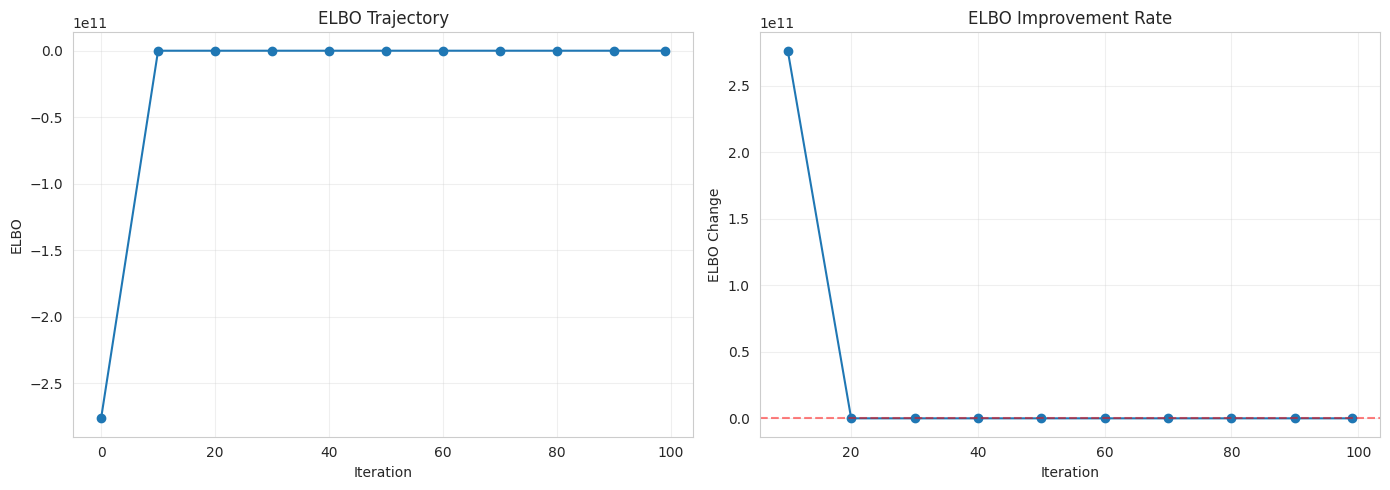

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Extract ELBO history
elbo_history = np.array(vi_summary['elbo_history'])
iterations = elbo_history[:, 0]
elbo_values = elbo_history[:, 1]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Raw ELBO
axes[0].plot(iterations, elbo_values, 'o-')
axes[0].set_xlabel('Iteration')
axes[0].set_ylabel('ELBO')
axes[0].set_title('ELBO Trajectory')
axes[0].grid(True, alpha=0.3)

# ELBO improvement per iteration
elbo_diff = np.diff(elbo_values)
iter_diff = iterations[1:]
axes[1].plot(iter_diff, elbo_diff, 'o-')
axes[1].axhline(y=0, color='r', linestyle='--', alpha=0.5)
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('ELBO Change')
axes[1].set_title('ELBO Improvement Rate')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('elbo_convergence.png', dpi=150, bbox_inches='tight')

# Convergence criterion
recent_change = np.abs(elbo_diff[-5:].mean())
print(f"Mean ELBO change (last 5 checkpoints): {recent_change:.2e}")
print(f"Relative change: {recent_change / np.abs(elbo_values[-1]):.2e}")
print(f"\nCONVERGED: {recent_change < 1e4}")  # threshold for this scale

In [66]:
# Examine v statistics from gene_programs
v_stats = {
    'v_weight_unique': gene_programs['v_weight'].unique(),
    'v_weight_mean': gene_programs['v_weight'].mean(),
    'v_weight_std': gene_programs['v_weight'].std()
}
print("V-weight statistics:")
for k, v in v_stats.items():
    print(f"  {k}: {v}")

# Expected: In control-only data, v should be near 0 (no disease signal)
# But should still vary across programs unless there's a bug

# Check if this is initialization value
print(f"\nInitialization value (sigma_v): {vi_summary['hyperparameters']['sigma_v']}")
print("Expected init ~ N(0, sigma_v^2)")

V-weight statistics:
  v_weight_unique: [-3.]
  v_weight_mean: -3.0
  v_weight_std: 0.0

Initialization value (sigma_v): 2.0
Expected init ~ N(0, sigma_v^2)


In [67]:
# Check if factors learned distinct patterns
from scipy.spatial.distance import pdist, squareform
from scipy.stats import entropy

# Gene program similarity (should NOT all be identical)
gene_cols = [c for c in gene_programs.columns if c.startswith('ENSMUSG')]
beta_matrix = gene_programs[gene_cols].values  # (20, 9860)

# Pairwise cosine similarity
cos_sim = np.corrcoef(beta_matrix)
upper_tri = cos_sim[np.triu_indices_from(cos_sim, k=1)]

print(f"Beta correlation stats:")
print(f"  Mean: {upper_tri.mean():.4f}")
print(f"  Std: {upper_tri.std():.4f}")
print(f"  Min: {upper_tri.min():.4f}")
print(f"  Max: {upper_tri.max():.4f}")

# Factor collapse if mean correlation > 0.95
if upper_tri.mean() > 0.95:
    print("\n⚠️ WARNING: Factor collapse detected")
else:
    print("\n✓ Factors learning distinct patterns")

# Sparsity per program
sparsity = (beta_matrix < 0.01).mean(axis=1)
print(f"\nSparsity per program:")
print(f"  Mean: {sparsity.mean():.3f}")
print(f"  Range: [{sparsity.min():.3f}, {sparsity.max():.3f}]")

Beta correlation stats:
  Mean: 0.5278
  Std: 0.1939
  Min: 0.1346
  Max: 0.9625

✓ Factors learning distinct patterns

Sparsity per program:
  Mean: 0.010
  Range: [0.000, 0.076]


In [68]:
# Check theta statistics match theoretical expectations
theta_all = np.vstack([theta_train, theta_val, theta_test])

print("Theta statistics:")
print(f"  Train shape: {theta_train.shape}")
print(f"  Mean: {theta_all.mean():.4f}")
print(f"  Median: {np.median(theta_all):.4f}")
print(f"  % zeros: {(theta_all < 1e-6).mean()*100:.2f}%")
print(f"  % > 0.5: {(theta_all > 0.5).mean()*100:.2f}%")

# Check for numeric overflow
if np.any(np.isnan(theta_all)) or np.any(np.isinf(theta_all)):
    print("\n⚠️ WARNING: NaN/Inf in theta")
if np.any(theta_all < 0):
    print("\n⚠️ WARNING: Negative theta values")
if np.any(theta_all > 1000):
    print(f"\n⚠️ WARNING: Theta max = {theta_all.max():.2e}")

Theta statistics:
  Train shape: (1434, 20)
  Mean: 0.1492
  Median: 0.0599
  % zeros: 0.00%
  % > 0.5: 7.08%


In [69]:
# Top genes per program
n_top = 20

for i in range(min(3, len(gene_programs))):  # Check first 3 programs
    program_name = gene_programs.iloc[i]['program']
    beta_vals = gene_programs.iloc[i][gene_cols].values
    
    top_idx = np.argsort(beta_vals)[-n_top:][::-1]
    top_genes = np.array(gene_cols)[top_idx]
    top_weights = beta_vals[top_idx]
    
    print(f"\n{program_name} - Top {n_top} genes:")
    print(f"  Weight range: [{top_weights.min():.2f}, {top_weights.max():.2f}]")
    print(f"  Genes: {', '.join(top_genes[:5])}...")


GP1 - Top 20 genes:
  Weight range: [8.87, 31.59]
  Genes: ENSMUSG00000060802, ENSMUSG00000021699, ENSMUSG00000007892, ENSMUSG00000079523, ENSMUSG00000064358...

GP2 - Top 20 genes:
  Weight range: [7.98, 35.65]
  Genes: ENSMUSG00000040270, ENSMUSG00000026238, ENSMUSG00000030067, ENSMUSG00000016559, ENSMUSG00000031668...

GP3 - Top 20 genes:
  Weight range: [13.63, 39.32]
  Genes: ENSMUSG00000064358, ENSMUSG00000064357, ENSMUSG00000064354, ENSMUSG00000026238, ENSMUSG00000090733...


In [132]:
import pickle
with open('/labs/Aguiar/SSPA_BRAY/BRay/synthetic_disease/progressive_tests/stage_1:_tiny_model.pkl', 'rb') as f:
    results = pickle.load(f)

In [133]:
results

In [134]:
import pickle
import numpy as np

In [140]:
with open('/labs/Aguiar/SSPA_BRAY/BRay/synthetic_disease/progressive_tests/stage_1:_tiny_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [141]:
model

In [142]:
beta = model.E_beta  # Shape: (n_genes, n_factors)
print(f"Beta shape: {beta.shape}")
print(f"Beta range: [{beta.min():.4f}, {beta.max():.4f}]")

Beta shape: (500, 5)
Beta range: [0.0000, 13.6477]


In [143]:
# Convert beta to DataFrame for better visualization
beta_df = pd.DataFrame(
    beta,
    columns=[f'Factor_{i+1}' for i in range(beta.shape[1])],
    index=train_data.columns[:beta.shape[0]]  # Use gene IDs as index
)

beta_df

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5
ENSMUSG00000095567,0.082655,0.165839,0.151424,0.264285,0.070686
ENSMUSG00000035692,0.112613,0.191357,0.102506,0.293248,0.036261
ENSMUSG00000041954,0.097644,0.171801,0.057480,0.205616,0.276431
ENSMUSG00000029076,0.036110,0.176141,0.102799,0.068154,0.317744
ENSMUSG00000050796,0.084786,0.113163,0.030581,0.333889,0.052224
...,...,...,...,...,...
ENSMUSG00000027884,0.718008,5.277778,13.647651,2.437054,0.395185
ENSMUSG00000040389,1.024606,6.790307,11.686027,3.705710,0.481696
ENSMUSG00000048100,1.040259,7.695199,12.034666,4.117762,0.728247
ENSMUSG00000068732,0.842839,7.455467,12.399331,2.914800,0.950137


/tmp/ipykernel_3387502/2035707457.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0, 1].boxplot([beta[:, i] for i in range(beta.shape[1])],


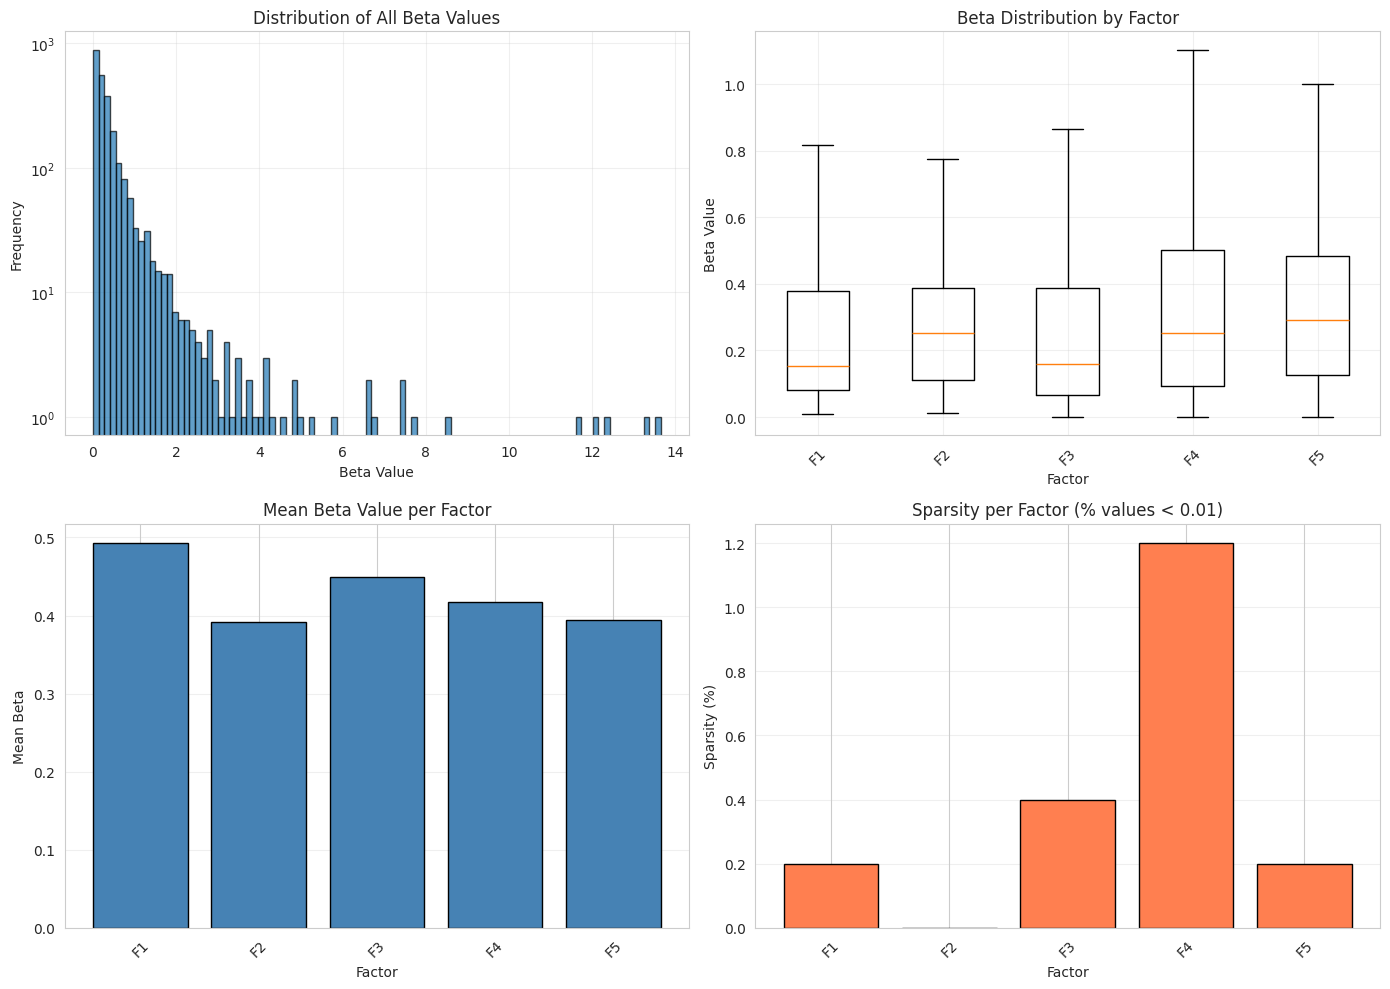


Beta Statistics:
Overall range: [0.0000, 13.6477]
Overall mean: 0.4292
Overall std: 0.8628
Overall sparsity (< 0.01): 0.40%

Per-factor statistics:
Factor 1: mean=0.4928, std=0.8472, sparsity=0.2%
Factor 2: mean=0.3920, std=0.7884, sparsity=0.0%
Factor 3: mean=0.4492, std=1.3560, sparsity=0.4%
Factor 4: mean=0.4179, std=0.5344, sparsity=1.2%
Factor 5: mean=0.3942, std=0.5015, sparsity=0.2%


In [144]:
import seaborn as sns

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Distribution of all beta values
axes[0, 0].hist(beta.flatten(), bins=100, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Beta Value')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of All Beta Values')
axes[0, 0].set_yscale('log')
axes[0, 0].grid(True, alpha=0.3)

# 2. Beta distribution per factor (boxplot)
axes[0, 1].boxplot([beta[:, i] for i in range(beta.shape[1])], 
                    labels=[f'F{i+1}' for i in range(beta.shape[1])],
                    showfliers=False)
axes[0, 1].set_xlabel('Factor')
axes[0, 1].set_ylabel('Beta Value')
axes[0, 1].set_title('Beta Distribution by Factor')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# 3. Mean beta per factor
mean_beta_per_factor = beta.mean(axis=0)
axes[1, 0].bar(range(beta.shape[1]), mean_beta_per_factor, color='steelblue', edgecolor='black')
axes[1, 0].set_xlabel('Factor')
axes[1, 0].set_ylabel('Mean Beta')
axes[1, 0].set_title('Mean Beta Value per Factor')
axes[1, 0].set_xticks(range(beta.shape[1]))
axes[1, 0].set_xticklabels([f'F{i+1}' for i in range(beta.shape[1])], rotation=45)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Sparsity per factor (% of values < 0.01)
sparsity_per_factor = (beta < 0.01).mean(axis=0) * 100
axes[1, 1].bar(range(beta.shape[1]), sparsity_per_factor, color='coral', edgecolor='black')
axes[1, 1].set_xlabel('Factor')
axes[1, 1].set_ylabel('Sparsity (%)')
axes[1, 1].set_title('Sparsity per Factor (% values < 0.01)')
axes[1, 1].set_xticks(range(beta.shape[1]))
axes[1, 1].set_xticklabels([f'F{i+1}' for i in range(beta.shape[1])], rotation=45)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('beta_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

# Print summary statistics
print("\nBeta Statistics:")
print(f"Overall range: [{beta.min():.4f}, {beta.max():.4f}]")
print(f"Overall mean: {beta.mean():.4f}")
print(f"Overall std: {beta.std():.4f}")
print(f"Overall sparsity (< 0.01): {(beta < 0.01).mean()*100:.2f}%")
print(f"\nPer-factor statistics:")
for i in range(beta.shape[1]):
    print(f"Factor {i+1}: mean={beta[:, i].mean():.4f}, std={beta[:, i].std():.4f}, sparsity={(beta[:, i] < 0.01).mean()*100:.1f}%")

In [145]:
corr = np.corrcoef(beta.T)  # Correlate factors, not genes
print(f"Mean correlation: {corr[np.triu_indices_from(corr, k=1)].mean():.4f}")


Mean correlation: 0.3611


In [146]:
theta = model.E_theta  # Shape: (n_samples, n_factors)
print(f"Theta shape: {theta.shape}")

Theta shape: (100, 5)


/tmp/ipykernel_3387502/4024179985.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0, 1].boxplot([theta[:, i] for i in range(theta.shape[1])],


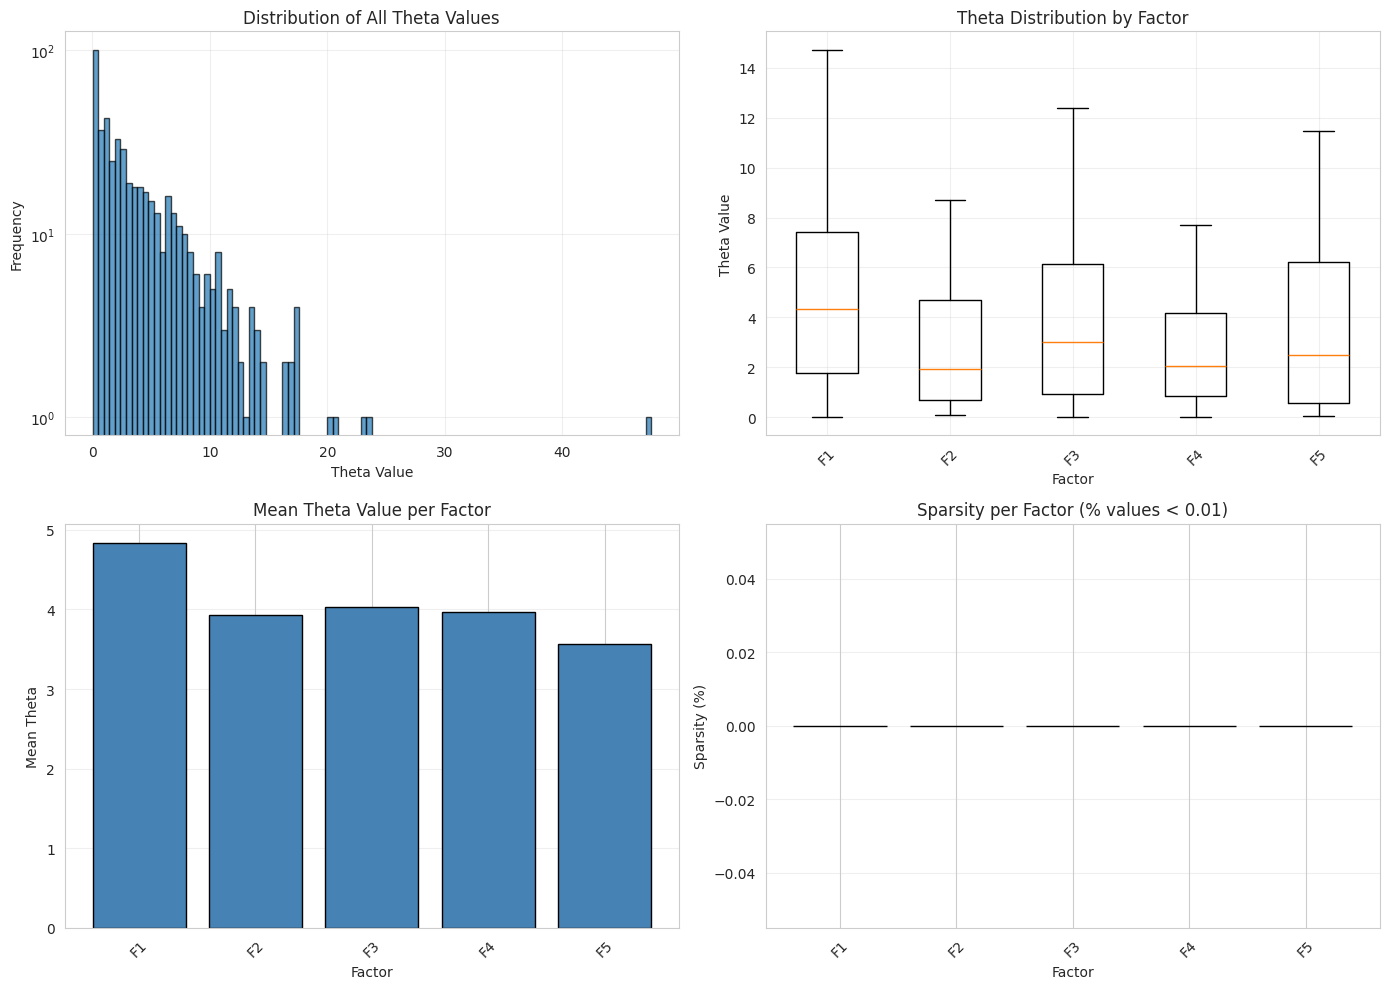


Theta Statistics:
Overall range: [0.0150, 47.5654]
Overall mean: 4.0638
Overall std: 4.6068
Overall sparsity (< 0.01): 0.00%

Per-factor statistics:
Factor 1: mean=4.8329, std=3.9583, sparsity=0.0%
Factor 2: mean=3.9267, std=6.0696, sparsity=0.0%
Factor 3: mean=4.0297, std=3.7010, sparsity=0.0%
Factor 4: mean=3.9695, std=5.1487, sparsity=0.0%
Factor 5: mean=3.5602, std=3.5390, sparsity=0.0%


In [147]:
import seaborn as sns

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Distribution of all theta values
axes[0, 0].hist(theta.flatten(), bins=100, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Theta Value')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of All Theta Values')
axes[0, 0].set_yscale('log')
axes[0, 0].grid(True, alpha=0.3)

# 2. Theta distribution per factor (boxplot)
axes[0, 1].boxplot([theta[:, i] for i in range(theta.shape[1])], 
                    labels=[f'F{i+1}' for i in range(theta.shape[1])],
                    showfliers=False)
axes[0, 1].set_xlabel('Factor')
axes[0, 1].set_ylabel('Theta Value')
axes[0, 1].set_title('Theta Distribution by Factor')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# 3. Mean theta per factor
mean_theta_per_factor = theta.mean(axis=0)
axes[1, 0].bar(range(theta.shape[1]), mean_theta_per_factor, color='steelblue', edgecolor='black')
axes[1, 0].set_xlabel('Factor')
axes[1, 0].set_ylabel('Mean Theta')
axes[1, 0].set_title('Mean Theta Value per Factor')
axes[1, 0].set_xticks(range(theta.shape[1]))
axes[1, 0].set_xticklabels([f'F{i+1}' for i in range(theta.shape[1])], rotation=45)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Sparsity per factor (% of values < 0.01)
sparsity_per_factor = (theta < 0.01).mean(axis=0) * 100
axes[1, 1].bar(range(theta.shape[1]), sparsity_per_factor, color='coral', edgecolor='black')
axes[1, 1].set_xlabel('Factor')
axes[1, 1].set_ylabel('Sparsity (%)')
axes[1, 1].set_title('Sparsity per Factor (% values < 0.01)')
axes[1, 1].set_xticks(range(theta.shape[1]))
axes[1, 1].set_xticklabels([f'F{i+1}' for i in range(theta.shape[1])], rotation=45)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('theta_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

# Print summary statistics
print("\nTheta Statistics:")
print(f"Overall range: [{theta.min():.4f}, {theta.max():.4f}]")
print(f"Overall mean: {theta.mean():.4f}")
print(f"Overall std: {theta.std():.4f}")
print(f"Overall sparsity (< 0.01): {(theta < 0.01).mean()*100:.2f}%")
print(f"\nPer-factor statistics:")
for i in range(theta.shape[1]):
    print(f"Factor {i+1}: mean={theta[:, i].mean():.4f}, std={theta[:, i].std():.4f}, sparsity={(theta[:, i] < 0.01).mean()*100:.1f}%")
 

In [148]:
v = model.mu_v  # Shape: (kappa, n_factors)
print(f"V-weight std: {v.std():.4f}")

V-weight std: 0.0815


In [149]:
v

array([[ 0.05404722, -0.01515207,  0.15823328, -0.05480636,  0.12948069]])

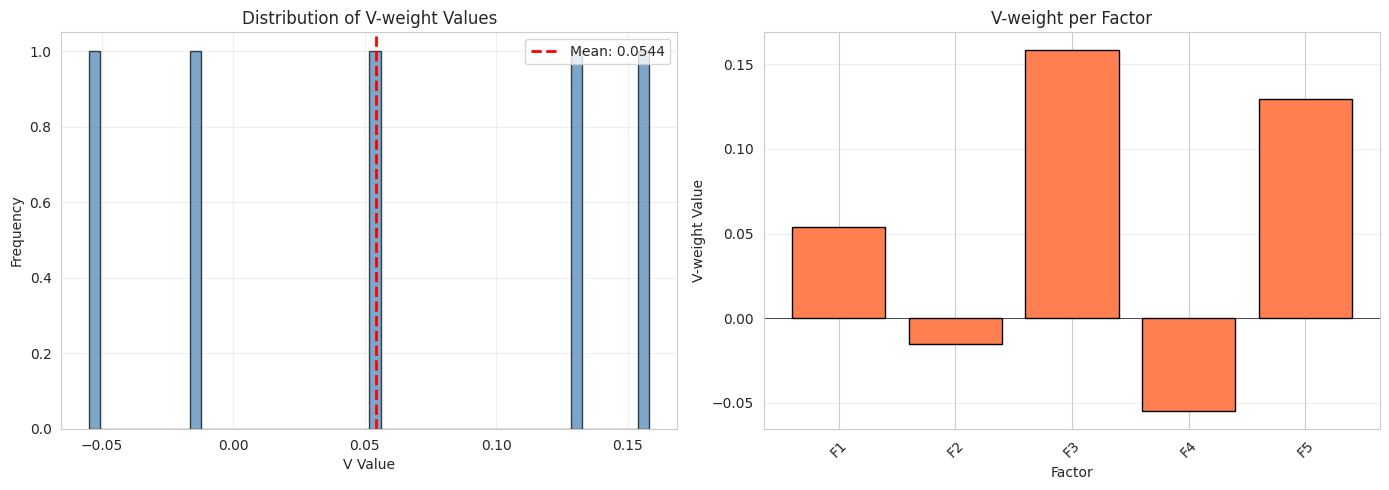


V-weight Statistics:
Shape: (1, 5)
Range: [-0.0548, 0.1582]
Mean: 0.0544
Std: 0.0815
Median: 0.0540

Per-factor values:
Factor 1: 0.0540
Factor 2: -0.0152
Factor 3: 0.1582
Factor 4: -0.0548
Factor 5: 0.1295


In [150]:
import seaborn as sns

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Distribution of v values
v_flat = v.flatten()
axes[0].hist(v_flat, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('V Value')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of V-weight Values')
axes[0].axvline(v_flat.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {v_flat.mean():.4f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. V values per factor
v_per_factor = v[0, :]  # Shape is (1, n_factors), take first row
axes[1].bar(range(len(v_per_factor)), v_per_factor, color='coral', edgecolor='black')
axes[1].set_xlabel('Factor')
axes[1].set_ylabel('V-weight Value')
axes[1].set_title('V-weight per Factor')
axes[1].set_xticks(range(len(v_per_factor)))
axes[1].set_xticklabels([f'F{i+1}' for i in range(len(v_per_factor))], rotation=45)
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('v_weight_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

# Print summary statistics
print("\nV-weight Statistics:")
print(f"Shape: {v.shape}")
print(f"Range: [{v.min():.4f}, {v.max():.4f}]")
print(f"Mean: {v.mean():.4f}")
print(f"Std: {v.std():.4f}")
print(f"Median: {np.median(v):.4f}")
print(f"\nPer-factor values:")
for i in range(v.shape[1]):
    print(f"Factor {i+1}: {v[0, i]:.4f}")

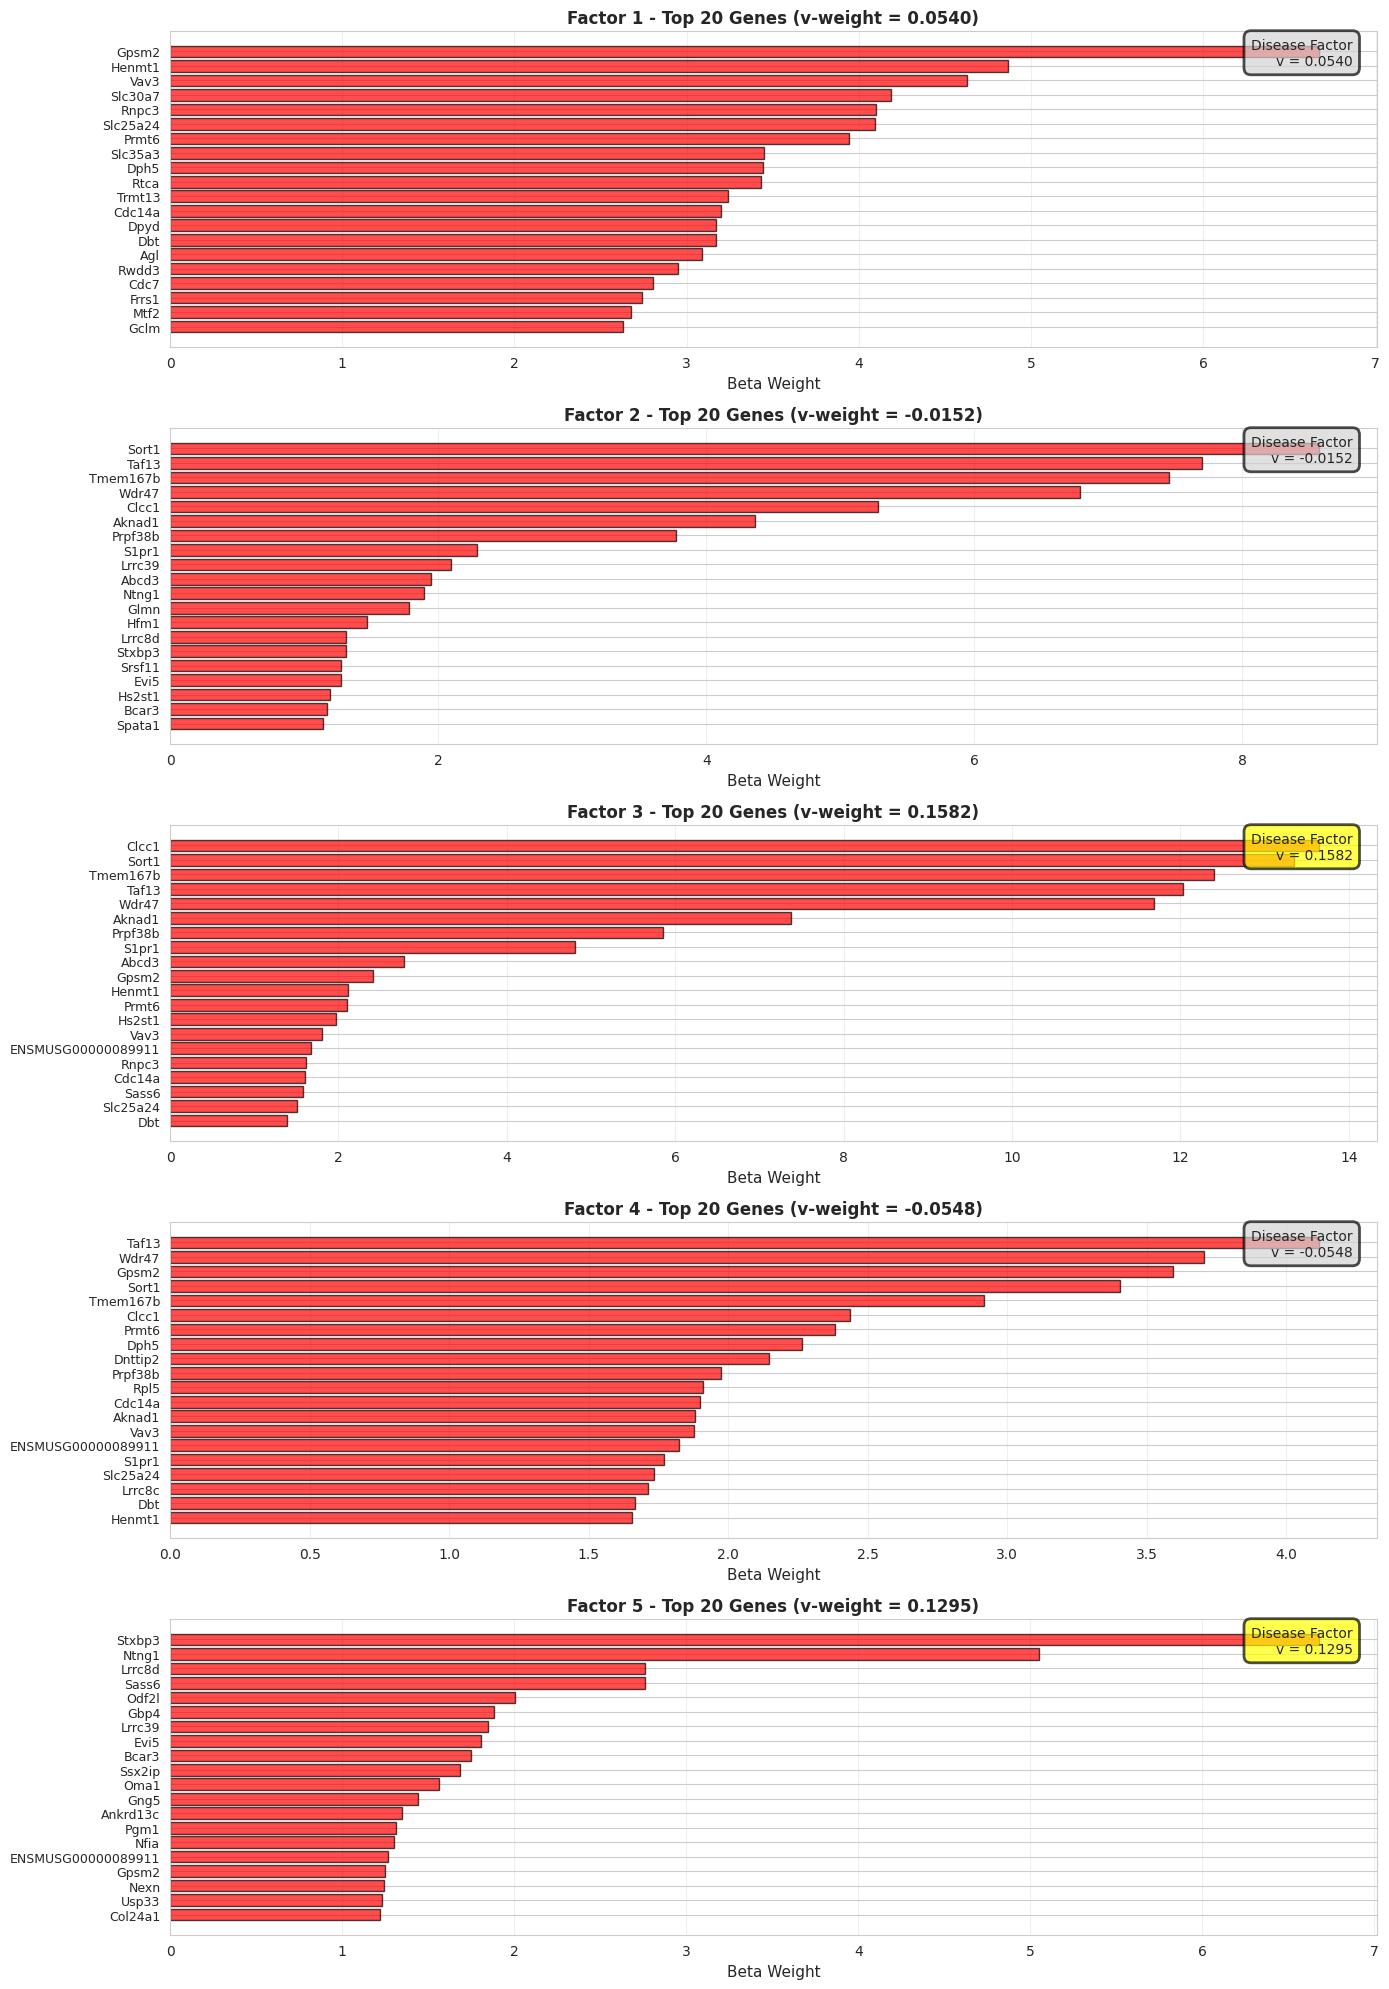


Summary of Factor Disease Contributions:
Factor 1: v-weight = 0.0540, Mean beta = 0.4928, Max beta = 6.6732
Factor 2: v-weight = -0.0152, Mean beta = 0.3920, Max beta = 8.5725
Factor 3: v-weight = 0.1582, Mean beta = 0.4492, Max beta = 13.6477
Factor 4: v-weight = -0.0548, Mean beta = 0.4179, Max beta = 4.1178
Factor 5: v-weight = 0.1295, Mean beta = 0.3942, Max beta = 6.6794


In [157]:
import numpy as np
import matplotlib.pyplot as plt

# Get gene names for the genes in the model
gene_names_in_model = train_data.columns.tolist()

# Convert Ensembl IDs to gene symbols
gene_symbols_in_model = []
for ensembl_id in gene_names_in_model:
    if ensembl_id in gene_annotation_ensembl_map.values():
        # Find the symbol that maps to this Ensembl ID
        symbol = [k for k, v in gene_annotation_ensembl_map.items() if v == ensembl_id]
        if symbol:
            gene_symbols_in_model.append(symbol[0])
        else:
            gene_symbols_in_model.append(ensembl_id)
    else:
        gene_symbols_in_model.append(ensembl_id)

# Create plots for first 5 factors
fig, axes = plt.subplots(5, 1, figsize=(14, 20))

for factor_idx in range(5):
    ax = axes[factor_idx]
    
    # Get beta values for this factor
    beta_factor = beta[:, factor_idx]
    
    # Get top 20 genes
    top_20_idx = np.argsort(beta_factor)[-20:][::-1]
    top_20_genes = [gene_symbols_in_model[i] for i in top_20_idx]
    top_20_weights = beta_factor[top_20_idx]
    
    # Get v-weight for this factor (disease contribution)
    v_weight = v[0, factor_idx]
    
    # Create barplot
    y_pos = np.arange(len(top_20_genes))
    colors = ['red' if w > 0 else 'blue' for w in top_20_weights]
    
    ax.barh(y_pos, top_20_weights, color=colors, edgecolor='black', alpha=0.7)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(top_20_genes, fontsize=9)
    ax.set_xlabel('Beta Weight', fontsize=11)
    ax.set_title(f'Factor {factor_idx + 1} - Top 20 Genes (v-weight = {v_weight:.4f})', 
                 fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='x')
    
    # Add v-weight indicator box
    bbox_props = dict(boxstyle='round,pad=0.5', facecolor='yellow' if abs(v_weight) > 0.1 else 'lightgray', 
                      alpha=0.7, edgecolor='black', linewidth=2)
    ax.text(0.98, 0.98, f'Disease Factor\nv = {v_weight:.4f}', 
            transform=ax.transAxes, fontsize=10, verticalalignment='top', 
            horizontalalignment='right', bbox=bbox_props)
    
    # Invert y-axis to show highest weight at top
    ax.invert_yaxis()

plt.tight_layout()
plt.savefig('top_5_factors_disease_genes.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nSummary of Factor Disease Contributions:")
for i in range(5):
    print(f"Factor {i+1}: v-weight = {v[0, i]:.4f}, "
          f"Mean beta = {beta[:, i].mean():.4f}, "
          f"Max beta = {beta[:, i].max():.4f}")

In [158]:
# Load gene list from file
with open('/labs/Aguiar/SSPA_BRAY/BRay/synthetic_disease/gene_list.txt', 'r') as f:
    gene_list = [line.strip() for line in f.readlines()]

print(f"Loaded {len(gene_list)} genes from gene_list.txt")

# Convert Ensembl IDs to gene symbols
gene_symbols = []
for ensembl_id in gene_list:
    if ensembl_id in gene_annotation_ensembl_map.values():
        # Find the symbol that maps to this Ensembl ID
        symbol = [k for k, v in gene_annotation_ensembl_map.items() if v == ensembl_id]
        if symbol:
            gene_symbols.append(symbol[0])
        else:
            gene_symbols.append(ensembl_id)
    else:
        gene_symbols.append(ensembl_id)

print(f"Converted {len(gene_symbols)} genes to symbols")
print(f"First 10 genes: {gene_symbols[:10]}")

Loaded 9860 genes from gene_list.txt
Converted 9860 genes to symbols
First 10 genes: ['Noc2l', 'Isg15', 'Tnfrsf18', 'Sdf4', 'B3galt6', 'Ube2j2', 'Acap3', 'Pusl1', 'ENSMUSG00000029034', 'Dvl1']
